# Table of Contents
## This script contains the following:
1. Import libraries
2. Import Data
3. Subsetting, wrangling and cleaning time-series data
4. Time series analysis: decomposition
5. Stationarizing the Data

# 1.0 Import libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# 2.0 Import data

### Why this timeseries?:

This time series shows the monthly visitor arrivals to Japan between 2010 - 2012. Although my analysis began with an interest in the 2004 Indian Ocean Tsunami, my analysis helped to uncover other recent extreme tsunami events, such as the **2011 Tōhoku earthquake and tsunami**. This tsunami left a lot of damage, and received a lot of media attention due to the damage sustained by the Fukushima nuclear power plant. For this reason, I thought it would be interesting to see if there was any change in the number of people choosing to holiday in Japan in the year following the distaster (which occured in March, 2011).

Dataset accessed on 27/02/2025 from "Japan National Tourism Organization (JNTO)".

In [8]:
# Define project folder path
path = r'/Users/sharnti/Desktop/CareerFoundry/Data Immersion/Achievement 6/Project'

In [9]:
# Import Japan travel data for 2010
jp10 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'japan_travel_2010.csv'))

In [10]:
jp10.head(5)

,Month,Year,Japanese Overseas Travelers,Visitor Arrivals to Japan
0,Jan.,2010,"1,264,299","640,346"
1,Feb.,2010,"1,289,825","664,982"
2,Mar.,2010,"1,563,113","709,684"
3,Apr.,2010,"1,212,959","788,212"
4,May,2010,"1,262,453","721,348"


In [11]:
jp10.shape

(12, 4)

In [12]:
# Import Japan travel data for 2011
jp11 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'japan_travel_2011.csv'))

In [13]:
jp11.head(5)

,Month,Year,Japanese Overseas Travelers,Visitor Arrivals to Japan
0,Jan.,2011,"1,282,348","714,099"
1,Feb.,2011,"1,391,193","679,393"
2,Mar.,2011,"1,420,584","352,676"
3,Apr.,2011,"1,114,906","295,826"
4,May,2011,"1,152,339","357,783"


In [14]:
jp11.shape

(12, 4)

In [15]:
# Import Japan travel data for 2012
jp12 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'japan_travel_2012.csv'))

In [16]:
jp12.head(5)

,Month,Year,Japanese Overseas Travelers,Visitor Arrivals to Japan
0,Jan.,2012,"1,331,144","681,786"
1,Feb.,2012,"1,572,587","546,451"
2,Mar.,2012,"1,737,033","676,662"
3,Apr.,2012,"1,410,963","779,481"
4,May,2012,"1,431,204","667,046"


In [17]:
jp12.shape

(12, 4)

In [18]:
# Combine the three DataFrames
df = pd.concat([jp10, jp11, jp12], ignore_index=True)

# Display the first few rows to verify
df.head()

,Month,Year,Japanese Overseas Travelers,Visitor Arrivals to Japan
0,Jan.,2010,"1,264,299","640,346"
1,Feb.,2010,"1,289,825","664,982"
2,Mar.,2010,"1,563,113","709,684"
3,Apr.,2010,"1,212,959","788,212"
4,May,2010,"1,262,453","721,348"


In [19]:
df = df.drop(columns=["Japanese Overseas Travelers"])

In [20]:
df.head()

,Month,Year,Visitor Arrivals to Japan
0,Jan.,2010,"640,346"
1,Feb.,2010,"664,982"
2,Mar.,2010,"709,684"
3,Apr.,2010,"788,212"
4,May,2010,"721,348"


In [21]:
df.shape

(36, 3)

In [22]:
df.columns

Index(['Month', 'Year', 'Visitor Arrivals to Japan'], dtype='object')

In [23]:
# Remove any trailing periods from the "Month" column
df["Month"] = df["Month"].str.replace(".", "", regex=False)

# Convert "Year" to string and create a date column
df["Date"] = pd.to_datetime(df["Month"] + " " + df["Year"].astype(str), format="%b %Y")

# Display the first few rows
df.head()

,Month,Year,Visitor Arrivals to Japan,Date
0,Jan,2010,"640,346",2010-01-01
1,Feb,2010,"664,982",2010-02-01
2,Mar,2010,"709,684",2010-03-01
3,Apr,2010,"788,212",2010-04-01
4,May,2010,"721,348",2010-05-01


In [24]:
# Drop columns 'Month' and 'Year'
df = df.drop(columns=["Month", "Year"])

# Display the first few rows
df.head()

,Visitor Arrivals to Japan,Date
0,"640,346",2010-01-01
1,"664,982",2010-02-01
2,"709,684",2010-03-01
3,"788,212",2010-04-01
4,"721,348",2010-05-01


In [25]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [26]:
df.head(5)

,Visitor Arrivals to Japan
Date,
2010-01-01,"640,346"
2010-02-01,"664,982"
2010-03-01,"709,684"
2010-04-01,"788,212"
2010-05-01,"721,348"


In [27]:
df.rename(columns={'Visitor Arrivals to Japan': 'Value'}, inplace=True)

df.head()

,Value
Date,
2010-01-01,"640,346"
2010-02-01,"664,982"
2010-03-01,"709,684"
2010-04-01,"788,212"
2010-05-01,"721,348"


In [28]:
df.dtypes

Value    object
dtype: object

In [29]:
# Remove commas from the 'Value' column and convert to float
df['Value'] = df['Value'].str.replace(',', '').astype(float)

# Check the updated DataFrame and data types
print(df)
print(df.dtypes)  # Should show 'Value' as float

               Value
Date                
2010-01-01  640346.0
2010-02-01  664982.0
2010-03-01  709684.0
2010-04-01  788212.0
2010-05-01  721348.0
2010-06-01  677064.0
2010-07-01  878582.0
2010-08-01  802725.0
2010-09-01  717756.0
2010-10-01  727278.0
2010-11-01  634818.0
2010-12-01  648380.0
2011-01-01  714099.0
2011-02-01  679393.0
2011-03-01  352676.0
2011-04-01  295826.0
2011-05-01  357783.0
2011-06-01  432883.0
2011-07-01  561489.0
2011-08-01  546503.0
2011-09-01  538727.0
2011-10-01  615701.0
2011-11-01  551571.0
2011-12-01  572101.0
2012-01-01  681786.0
2012-02-01  546451.0
2012-03-01  676662.0
2012-04-01  779481.0
2012-05-01  667046.0
2012-06-01  682932.0
2012-07-01  847194.0
2012-08-01  774239.0
2012-09-01  658239.0
2012-10-01  705848.0
2012-11-01  648548.0
2012-12-01  689679.0
Value    float64
dtype: object


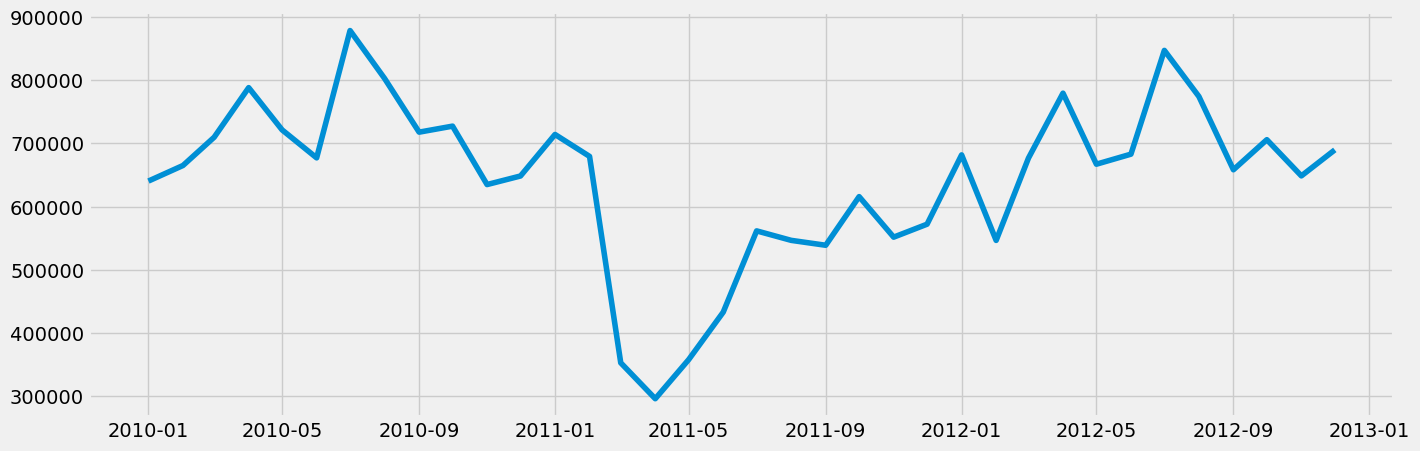

In [30]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

In [89]:
# Compute Simple Moving Average (SMA) with a 3-month window
df["SMA_3"] = df["Value"].rolling(window=3, center=True).mean()

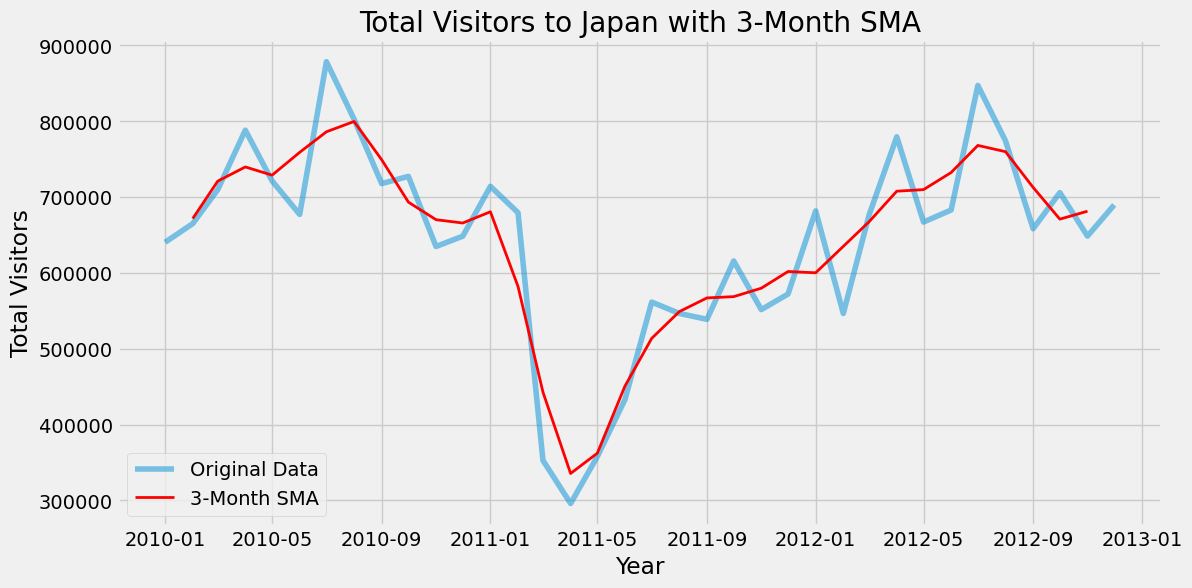

In [101]:
# Plot the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Value"], label="Original Data", alpha=0.5)
plt.plot(df.index, df["SMA_3"], label="3-Month SMA", color="red", linewidth=2)

plt.xlabel("Year")
plt.ylabel("Total Visitors")
plt.title("Total Visitors to Japan with 3-Month SMA")
plt.legend()
plt.show()

# 3.0 Subsetting, wrangling, and cleaning time-series data

In [120]:
SMA = df["SMA_3"]

In [122]:
SMA

Date
2010-01-01              NaN
2010-02-01    671670.666667
2010-03-01    720959.333333
2010-04-01    739748.000000
2010-05-01    728874.666667
2010-06-01    758998.000000
2010-07-01    786123.666667
2010-08-01    799687.666667
2010-09-01    749253.000000
2010-10-01    693284.000000
2010-11-01    670158.666667
2010-12-01    665765.666667
2011-01-01    680624.000000
2011-02-01    582056.000000
2011-03-01    442631.666667
2011-04-01    335428.333333
2011-05-01    362164.000000
2011-06-01    450718.333333
2011-07-01    513625.000000
2011-08-01    548906.333333
2011-09-01    566977.000000
2011-10-01    568666.333333
2011-11-01    579791.000000
2011-12-01    601819.333333
2012-01-01    600112.666667
2012-02-01    634966.333333
2012-03-01    667531.333333
2012-04-01    707729.666667
2012-05-01    709819.666667
2012-06-01    732390.666667
2012-07-01    768121.666667
2012-08-01    759890.666667
2012-09-01    712775.333333
2012-10-01    670878.333333
2012-11-01    681358.333333
2012-12-01     

In [124]:
SMA.dropna(inplace=True)

In [126]:
# Check for missing values (you shouldn't have any)
SMA.isnull().sum() 

0

In [128]:
# Check for missing values (you shouldn't have any)
df.isnull().sum() 

Value    0
SMA_3    2
dtype: int64

In [136]:
df = df.drop(columns=["SMA_3"])

In [138]:
# Check for missing values (you shouldn't have any)
df.isnull().sum()

Value    0
dtype: int64

In [140]:
# Check for duplicates
dups = df.duplicated()
dups.sum()

# No dups!

0

In [142]:
# Check for duplicates
dups = SMA.duplicated()
dups.sum()

# No dups!

0

# 4.0 Time series analysis: decomposition

## Monthly values

In [148]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [150]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

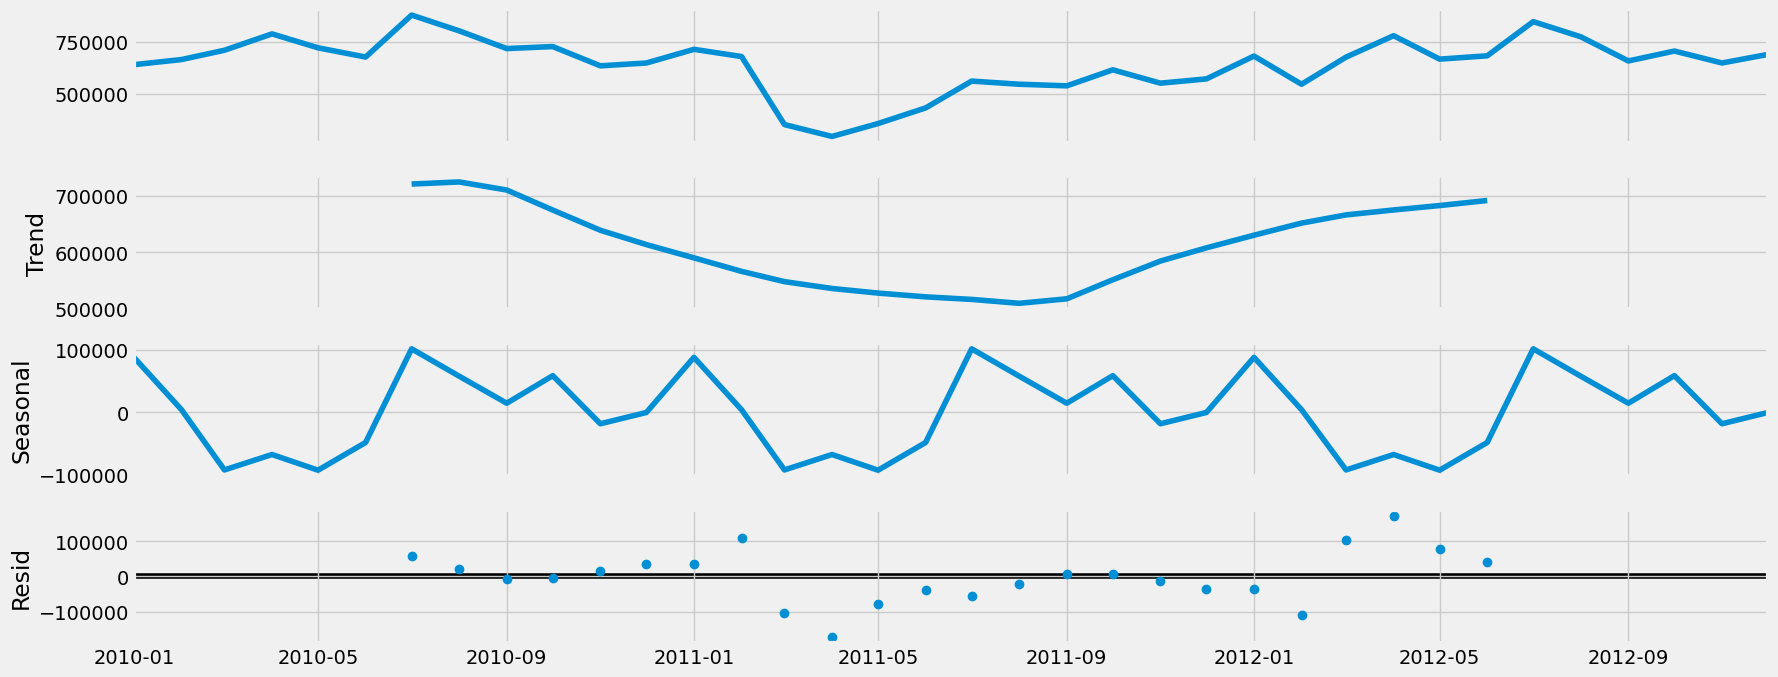

In [152]:
# Plot the separate components

decomposition.plot()
plt.show()

**Note:** We can see in the trend that there is a slight dip in visitors in 2011. However, this trend begins at the end of 2010 - before the tsunami struck, so it is likely unrelated.

When we look at seasonality, we can see that there are regular travel peaks (July, October and January each year) as well as regular dips (March - May).

It's interesting to see this separated, as this is difficult to see in the original time series plot.

## 3-Month Simple Moving Average (SMA)

In [162]:
# Decompose the time series using an additive model

decomposition_SMA = sm.tsa.seasonal_decompose(SMA, model='additive')

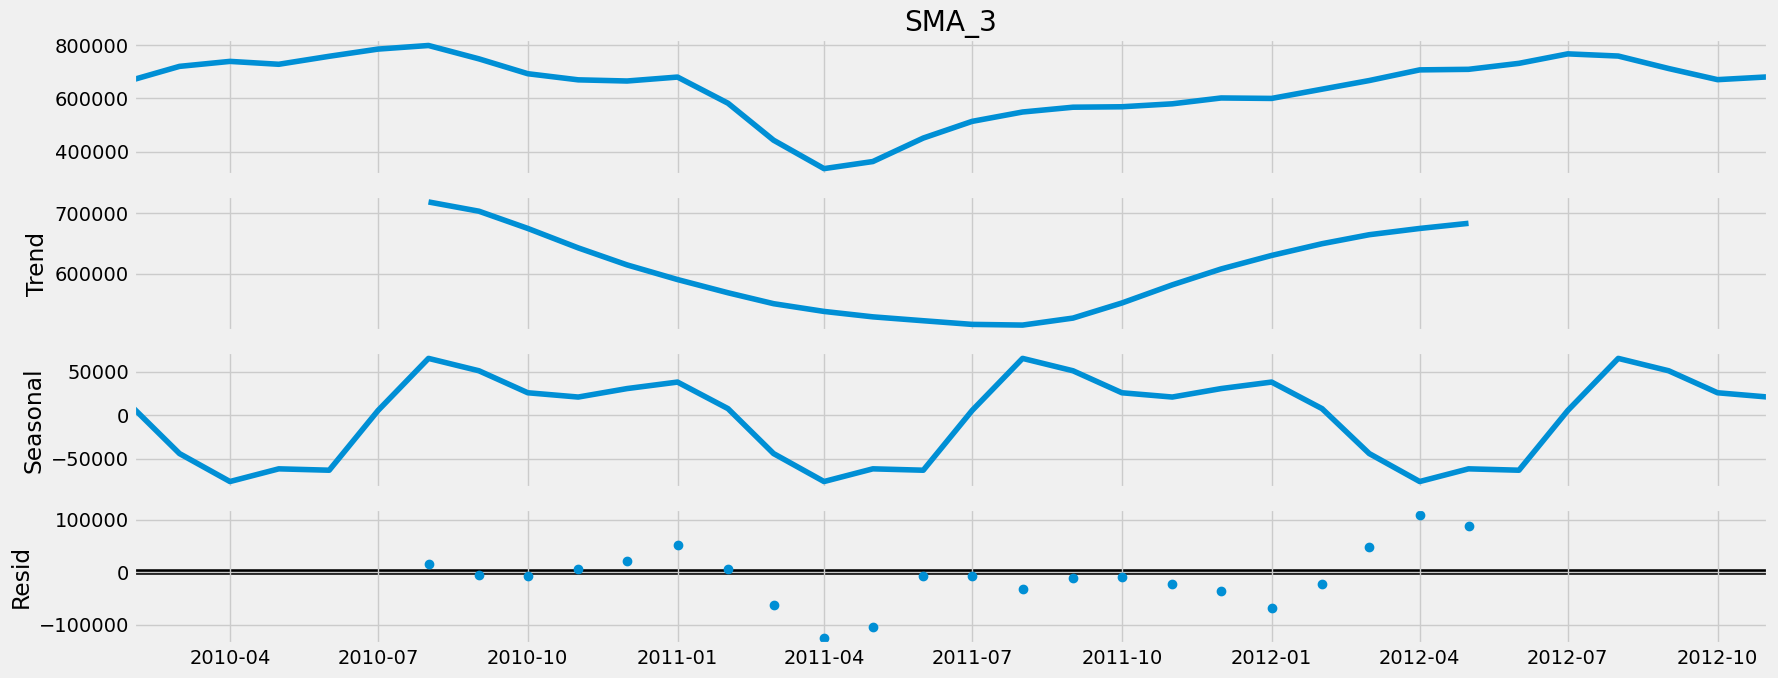

In [164]:
# Plot the separate components

decomposition_SMA.plot()
plt.show()

**Note:** Looking at the results from our smoothed dataset, we can see that it isn't significantly different from the monthly data.

We can see in the trend that there is a slight dip in visitors in 2011. However, this trend begins at the end of 2010 - before the tsunami struck, so it is likely unrelated.

When we look at seasonality, we can see that there are regular travel peaks (August and January each year) as well as regular dips (April - June). These dates are a little later than in the absolute plot (but this is likely a feature of the SMA).

Overall, there isn't much difference between the SMA and the monthly plots. I'll proceed with analysing just the monthly plot.

# 5.0 Testing for stationarity

In [168]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.369489
p-value                         0.150534
Number of Lags Used             0.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


The **Dickey-Fuller test** checks for the presence of a _unit root_ (i.e any random jump that can’t be explained by variation in the data).

#### Null Hypothesis (H0)
- H0:The time series has a unit root (i.e., it is non-stationary)

#### Alternative Hypothesis (Ha)
- Ha:The time series is stationary (i.e., does not have a unit root)

In our scenario above, the test statistic larger is larger than critical value, which means we **cannot** reject null hypothesis. This means that the data is non-staionary and we will have to stationarize it.

# 6.0 Stationarizing the Data

In [200]:
data_diff = df - df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [202]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [204]:
data_diff.head()

,Value
Date,
2010-02-01,24636.0
2010-03-01,44702.0
2010-04-01,78528.0
2010-05-01,-66864.0
2010-06-01,-44284.0


In [206]:
data_diff.columns

Index(['Value'], dtype='object')

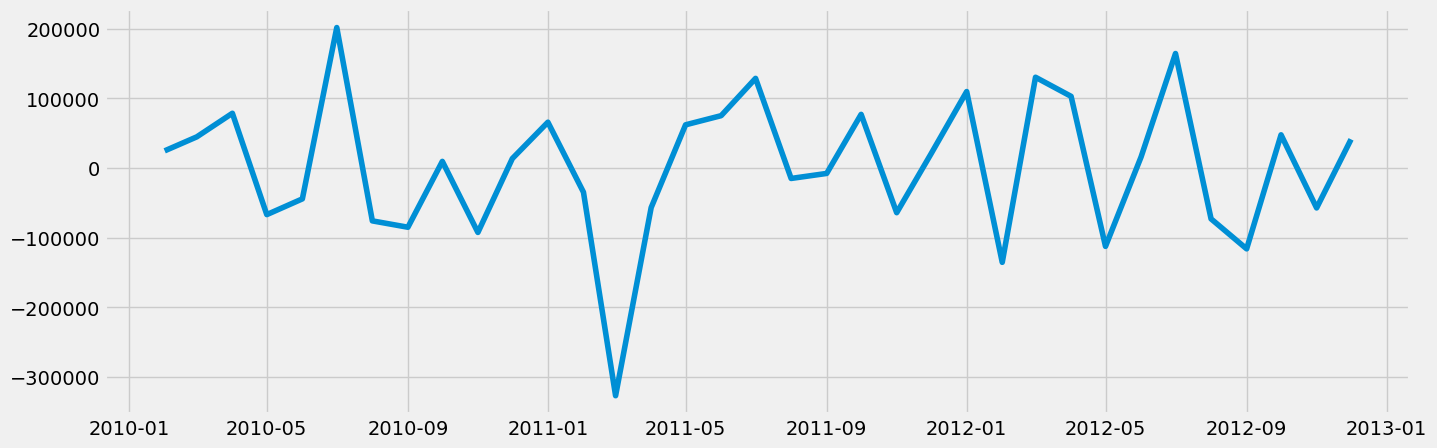

In [208]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [210]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.927935e+00
p-value                        2.418716e-07
Number of Lags Used            1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


Our null and alternative hypothesis remain the same as before:

#### Null Hypothesis (H0)
- H0:The time series has a unit root (i.e., it is non-stationary)

#### Alternative Hypothesis (Ha)
- Ha:The time series is stationary (i.e., does not have a unit root)

Our test statistic is now smaller than the critical value (1%) and we can reject the null hypothesis.

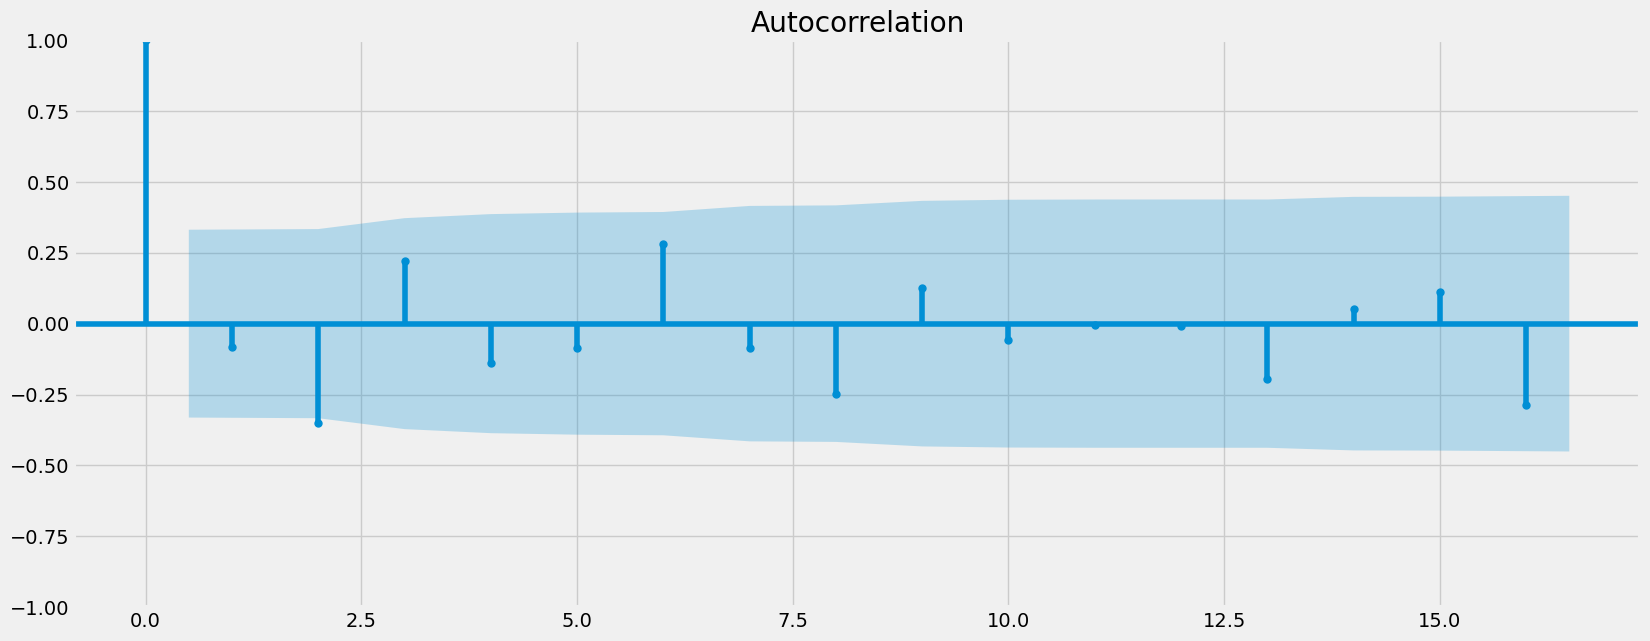

In [213]:
plot_acf(data_diff)
plt.show()

Autocorrelation looks okay.